# Polynomial Regression

## Importing the libraries

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [143]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [144]:
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


- As we have very small dataset, we'll not split this dataset in train-test sets.

In [145]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Linear Regression model on the whole dataset

In [146]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [147]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
print(X_poly)

# # X_poly2 = poly_reg.fit(X)
# print('1', X_poly2)
# X_poly2 = poly_reg.transform(X)
# print('2', X_poly2)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

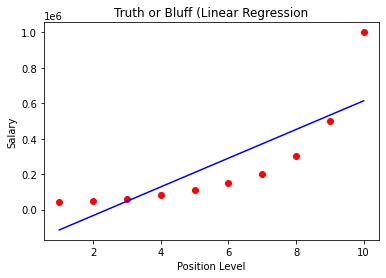

In [148]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or Bluff (Linear Regression')
plt.show()

## Visualising the Polynomial Regression results

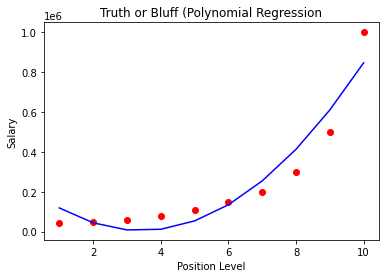

In [149]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(X_poly), color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or Bluff (Polynomial Regression')
plt.show()

- Comparision with different degrees of equations : 

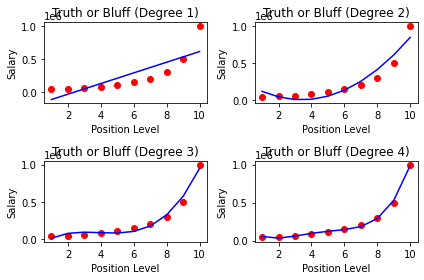

In [150]:
# For Degree 1 : 
plt.subplot(2,2,1)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or Bluff (Degree 1)')


# For Degree 2 : 
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2.fit(X_poly, y)

plt.subplot(2,2,2)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(X_poly), color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or Bluff (Degree 2)')


# For Degree 3 : 
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
lin_reg_2.fit(X_poly, y)

plt.subplot(2,2,3)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(X_poly), color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or Bluff (Degree 3)')


# For Degree 4 : 
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2.fit(X_poly, y)

plt.subplot(2,2,4)
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_2.predict(X_poly), color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or Bluff (Degree 4)')


plt.tight_layout() # adjust spaces b/w graphs
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

1. Here as we have smaller data, and we want to smother the curve, we'll generate multiple dummy data b/w 1 to 10 with 0.1 difference.
2. Here we generated X_grid, in which there are 90 data which varies b/w 1 to 10.
3. Then we created Polynomial Features of degree 4 and fitted that model on X_grid to create new variable X_poly which has 4 values of each data.
4. Then we created lin_reg_2 model and fitted original X as we don't have enough y values for this newly created X_grid's 90 data. we only have independent 90 variables. we don't have their dependent 90 Y values. 
5. So we fitted model lin_reg_2 on original dataset.
6. then we predicted results with `X_grid as X` and `lin_reg_2.predict(X_poly) as y`. Also generated graph.

(90, 5)
(90, 1)


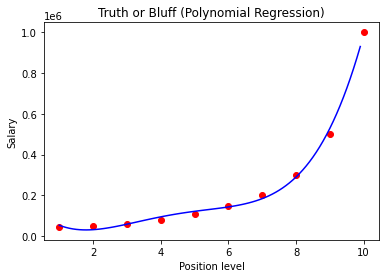

In [151]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_grid)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(poly_reg.fit_transform(X), y)

print(X_poly.shape)
# print(X_poly)
print(X_grid.shape)
# print(X_grid)

plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

plt.plot(X_grid, lin_reg_2.predict(X_poly), color='blue')

## Predicting a new result with Linear Regression

In [152]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [156]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform([[6.5]])

print('method 1 :',lin_reg_2.predict(X_poly))
print('method 2 :',lin_reg_2.predict(PolynomialFeatures(degree=4).fit_transform([[6.5]])))

method 1 : [158862.45265155]
method 2 : [158862.45265155]
